<a href="https://colab.research.google.com/github/manashpratim/Food-Demand-Forecasting/blob/master/Food_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**
"The client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants  help for these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc."

In [1]:
#Downloading the datasets
!wget --no-check-certificate \
      "https://datahack-prod.s3.amazonaws.com/train_file/train_GzS76OK.zip"\
      -O "/tmp/train.zip"

!wget --no-check-certificate \
      "https://datahack-prod.s3.amazonaws.com/test_file/test_QoiMO9B.csv"\
      -O "/tmp/test.csv"

--2019-07-14 02:33:46--  https://datahack-prod.s3.amazonaws.com/train_file/train_GzS76OK.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.48
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5487936 (5.2M) [application/x-zip-compressed]
Saving to: ‘/tmp/train.zip’

/tmp/train.zip      100%[===================>]   5.23M  2.64MB/s    in 2.0s    

2019-07-14 02:33:49 (2.64 MB/s) - ‘/tmp/train.zip’ saved [5487936/5487936]

--2019-07-14 02:33:51--  https://datahack-prod.s3.amazonaws.com/test_file/test_QoiMO9B.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.72
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1239576 (1.2M) [application/vnd.ms-excel]
Saving to: ‘/tmp/test.csv’

/tmp

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/train.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/train')
zip_ref.close()

In [0]:
import numpy as np
import pandas as pd
df1=pd.read_csv('/tmp/train/train.csv')
df2=pd.read_csv('/tmp/train/fulfilment_center_info.csv')
df3=pd.read_csv('/tmp/train/meal_info.csv')
df4=pd.read_csv('/tmp/test.csv')

In [0]:
#creating the training dataframe by joining the other dataframes
train=pd.merge(df1, df2, on='center_id')
train=pd.merge(train, df3, on='meal_id')

In [0]:
#same operation for the test dataframe
test=pd.merge(df4, df2, on='center_id')
test=pd.merge(test, df3, on='meal_id')

In [31]:
train.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai


In [32]:
test.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [35]:
# Checking Null values in Train Set
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [36]:
# Checking Null values in Test Set
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

**The datasets have no missing values.**

## **Data Visualizations and Feature Engineering**

Meal Cuisine Distribution:
 Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64


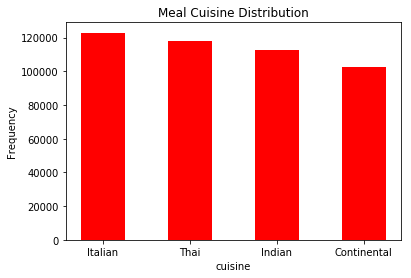

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['cuisine'].value_counts().index, train['cuisine'].value_counts(), width=0.5, bottom=None, align='center', data=train, color='r')
plt.title('Meal Cuisine Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('cuisine')
plt.ylabel('Frequency')
print('Meal Cuisine Distribution:\n',train['cuisine'].value_counts())

Center Type Distribution:
 TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64


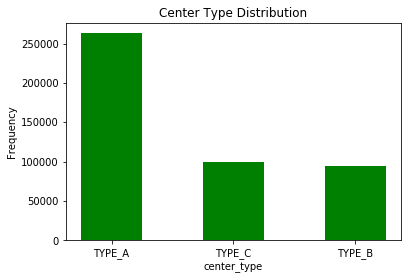

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['center_type'].value_counts().index, train['center_type'].value_counts(), width=0.5, bottom=None, align='center', data=train, color='g')
plt.title('Center Type Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('center_type')
plt.ylabel('Frequency')
print('Center Type Distribution:\n',train['center_type'].value_counts())

Emailer for Promotion Distribution:
 0    419498
1     37050
Name: emailer_for_promotion, dtype: int64


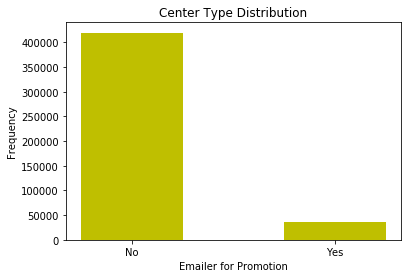

In [56]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['emailer_for_promotion'].value_counts().index, train['emailer_for_promotion'].value_counts(), width=0.5, bottom=None, align='center', data=train, color='y')
plt.title('Center Type Distribution')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.xlabel('Emailer for Promotion')
plt.ylabel('Frequency')
print('Emailer for Promotion Distribution:\n',train['emailer_for_promotion'].value_counts())

Homepage Featured Distribution:
 0    406693
1     49855
Name: homepage_featured, dtype: int64


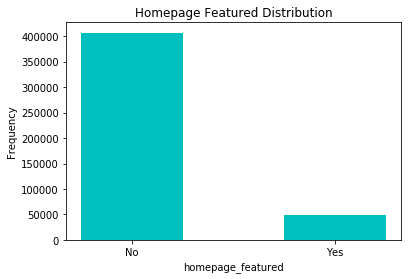

In [59]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['homepage_featured'].value_counts().index, train['homepage_featured'].value_counts(), width=0.5, bottom=None, align='center', data=train, color='c')
plt.title('Homepage Featured Distribution')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.xlabel('homepage_featured')
plt.ylabel('Frequency')
print('Homepage Featured Distribution:\n',train['homepage_featured'].value_counts())

Text(0, 0.5, 'Number of Items')

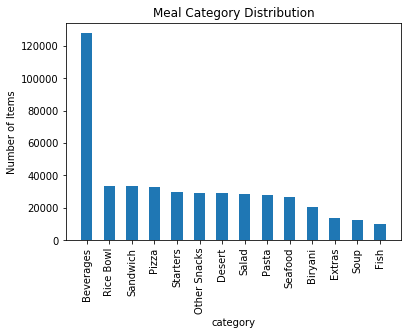

In [75]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['category'].value_counts().index, train['category'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Meal Category Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('category')
plt.ylabel('Number of Items')
#print('Meal Category Distribution:\n',train['category'].value_counts())

Text(0, 0.5, 'Number of orders')

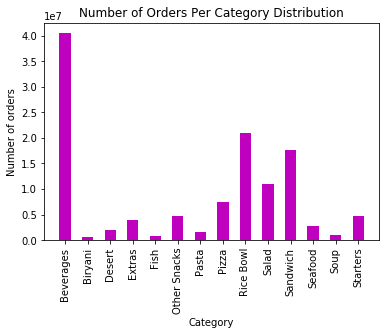

In [74]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train.groupby( [ "category"] )['num_orders'].sum().index,train.groupby( [ "category"] )['num_orders'].sum(), width=0.5, bottom=None, align='center', data=train, color='m')
plt.title('Number of Orders Per Category Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Number of orders')
#print('Homepage Featured Distribution:\n',train['homepage_featured'].value_counts())

**We can see that Beverages outnumbers all other categories both in number of items and number of orders. So, we can combine all the other items under a new category "Foods".**

In [0]:
def food(col):
  if col=='Beverages':
    return col
  else:
    return 'Foods'

In [0]:
train['Category']=train['category'].apply(food)
test['Category']=test['category'].apply(food)

Text(0, 0.5, 'Number of orders')

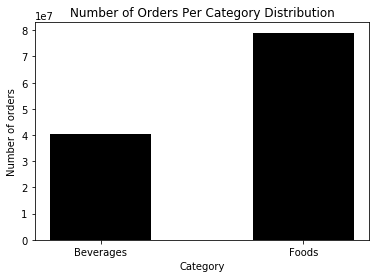

In [88]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train.groupby( [ "Category"] )['num_orders'].sum().index,train.groupby( [ "Category"] )['num_orders'].sum(), width=0.5, bottom=None, align='center', data=train, color='k')
plt.title('Number of Orders Per Category Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Number of orders')